# Water Quality Prediction Using Median Imputation

### importing Datasets

In [1]:
# For data access
import pandas as pd

# For splitting data
import numpy as np
from sklearn.model_selection import train_test_split

# Using KNN classifier
from sklearn.neighbors import KNeighborsClassifier as knn

# Using SVM classifier
from sklearn.svm import SVC as sve

# Using Random Forest
from sklearn.ensemble import RandomForestClassifier

# Using KNN Imputer
from sklearn.impute import KNNImputer

# Using cross_value for cross-validation
from sklearn.model_selection import cross_val_score

# Using KFold cross-validation
from sklearn.model_selection import KFold as kf

# Using StratifiedKFold and GridSearchCV
from sklearn.model_selection import StratifiedKFold, GridSearchCV

# Using accuracy score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Using confusion matrix
from sklearn.metrics import confusion_matrix

# Using Standard Scaler
from sklearn.preprocessing import StandardScaler

# Using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Importing visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt


In [12]:
import pandas as pd

# Read your CSV file into a DataFrame
df = pd.read_csv('Water_Quality_Dataset.csv')

target_column='Target'

# Shuffle the DataFrame
shuffled_df = df.sample(frac=1).reset_index(drop=True)

# Print the shape and the first few rows of the shuffled DataFrame
print(shuffled_df.shape)


(18001, 24)


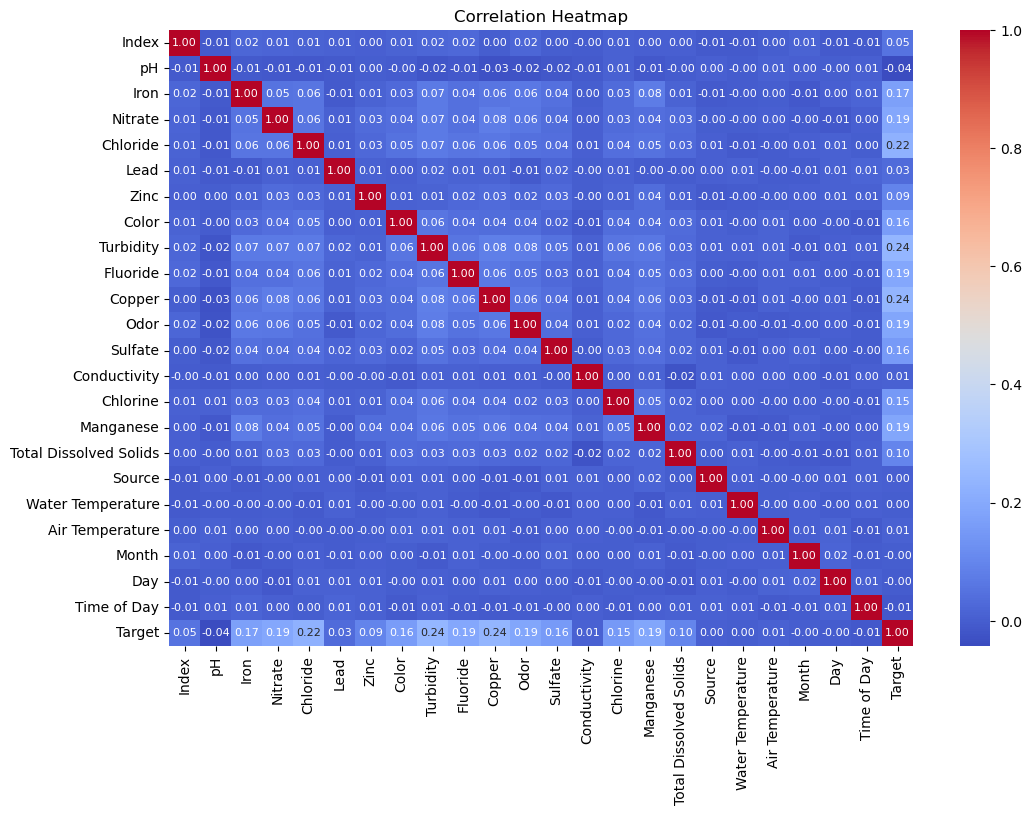

In [5]:
from sklearn.preprocessing import LabelEncoder
# Encode categorical columns if present
subset_data_encoded = shuffled_df.copy()
for col in subset_data_encoded.select_dtypes(include=['object']).columns:
    subset_data_encoded[col] = LabelEncoder().fit_transform(subset_data_encoded[col])

# Calculate the correlation matrix between attributes and the target variable
correlation_matrix = subset_data_encoded.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 8})
plt.title('Correlation Heatmap')
plt.show()


In [6]:
# Reading the CSV file into a DataFrame
a = subset_data_encoded

# Filling missing values with group-wise medians

a['Copper'].fillna(a.groupby(["Target"])['Copper'].transform('median'), inplace=True)
a['Chloride'].fillna(a.groupby(["Target"])['Chloride'].transform('median'), inplace=True)
a['Fluoride'].fillna(a.groupby(["Chloride"])['Fluoride'].transform('median'), inplace=True)
a['Fluoride'].fillna(a['Fluoride'].median(), inplace=True)
a['Turbidity'].fillna(a.groupby(["Copper"])['Turbidity'].transform('median'), inplace=True)
a['Iron'].fillna(a.groupby(["Target"])['Iron'].transform('median'), inplace=True)
a['Manganese'].fillna(a.groupby(["Iron"])['Manganese'].transform('median'), inplace=True)
a['Iron'].fillna(a['Iron'].median(), inplace=True)
a['Nitrate'].fillna(a.groupby(["Copper"])['Nitrate'].transform('median'), inplace=True)
a['Nitrate'].fillna(a['Nitrate'].median(), inplace=True)
a['Chloride'].fillna(a['Chloride'].median(), inplace=True)
a['Zinc'].fillna(a.groupby(["Target"])['Zinc'].transform('median'), inplace=True)
a['Lead'].fillna(a['Lead'].median(), inplace=True)

a['Turbidity'].fillna(a['Turbidity'].median(), inplace=True)
a['Copper'].fillna(a.groupby(["Chloride"])['Copper'].transform('median'), inplace=True)
a['Odor'].fillna(a.groupby(["Target"])['Odor'].transform('median'), inplace=True)
a['Sulfate'].fillna(a['Sulfate'].median(), inplace=True)
a['Chlorine'].fillna(a['Chlorine'].median(), inplace=True)

a['Manganese'].fillna(a['Manganese'].median(), inplace=True)
a['Total Dissolved Solids'].fillna(a.groupby(["Target"])['Total Dissolved Solids'].transform('median'), inplace=True)
a['Water Temperature'].fillna(a.groupby(["Source"])['Water Temperature'].transform('median'), inplace=True)
a['Conductivity'].fillna(a.groupby(["Target"])['Conductivity'].transform('median'), inplace=True)

a['Month'].fillna(a['Month'].median(), inplace=True)
a['Day'].fillna(a['Day'].median(), inplace=True)
a['Time of Day'].fillna(a['Time of Day'].median(), inplace=True)
a['Air Temperature'].fillna(a['Air Temperature'].median(), inplace=True)

a['pH'].fillna(a['pH'].median(), inplace=True)

a['Air Temperature'].fillna(a['Air Temperature'].median(), inplace=True)

# Select categorical columns for one-hot encoding
categorical_columns = ['Color', 'Source']

# Perform one-hot encoding
a = pd.get_dummies(a, columns=categorical_columns)

# Displaying the count of missing values after filling
print("The count of missing values after Applying Median Imputation:\n")
print(a.isnull().sum())
print("\n")


The count of missing values after Applying Median Imputation:

Index                     0
pH                        0
Iron                      0
Nitrate                   0
Chloride                  0
Lead                      0
Zinc                      0
Turbidity                 0
Fluoride                  0
Copper                    0
Odor                      0
Sulfate                   0
Conductivity              0
Chlorine                  0
Manganese                 0
Total Dissolved Solids    0
Water Temperature         0
Air Temperature           0
Month                     0
Day                       0
Time of Day               0
Target                    0
Color_0                   0
Color_1                   0
Color_2                   0
Color_3                   0
Color_4                   0
Color_5                   0
Source_0                  0
Source_1                  0
Source_2                  0
Source_3                  0
Source_4                  0
Source_5     

In [7]:
# Filter features with negative correlation with the target variable
negative_correlation_features = correlation_matrix[target_column][correlation_matrix[target_column] < 0].index

# Remove columns with negative correlation from the subset dataset
subset_data_filtered = a.drop(columns=negative_correlation_features, axis=1)
subset_data_filtered.drop('Index', axis=1, inplace=True)

print(subset_data_filtered.dtypes)

Iron                      float64
Nitrate                   float64
Chloride                  float64
Lead                      float64
Zinc                      float64
Turbidity                 float64
Fluoride                  float64
Copper                    float64
Odor                      float64
Sulfate                   float64
Conductivity              float64
Chlorine                  float64
Manganese                 float64
Total Dissolved Solids    float64
Water Temperature         float64
Air Temperature           float64
Target                      int64
Color_0                     uint8
Color_1                     uint8
Color_2                     uint8
Color_3                     uint8
Color_4                     uint8
Color_5                     uint8
Source_0                    uint8
Source_1                    uint8
Source_2                    uint8
Source_3                    uint8
Source_4                    uint8
Source_5                    uint8
Source_6      

# RandomForest Classifier

### Hyper Parameter Tuning

In [ ]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define StratifiedKFold cross-validation with 7 splits
skf = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)

# Define a dictionary of hyperparameters for RandomizedSearchCV
random_grid = {
    'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000],
    'min_samples_split': [2, 5, 10, 14],
    'min_samples_leaf': [1, 2, 4, 6, 8], 
    'criterion': ['entropy']
}

# Create a base RandomForestClassifier
rf = RandomForestClassifier()

# Perform RandomizedSearchCV
rf_randomcv = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=400, cv=skf, verbose=1, n_jobs=-1)
rf_randomcv.fit(X, y)

# Print the best hyperparameters from RandomizedSearchCV
print(rf_randomcv.best_params_)

# Define a parameter grid for GridSearchCV using the best parameters from RandomizedSearchCV
param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'],
                         rf_randomcv.best_params_['min_samples_leaf'] + 2,
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'],
                          rf_randomcv.best_params_['min_samples_split'] + 1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 200,
                     rf_randomcv.best_params_['n_estimators'] - 100,
                     rf_randomcv.best_params_['n_estimators'],
                     rf_randomcv.best_params_['n_estimators'] + 100,
                     rf_randomcv.best_params_['n_estimators'] + 200],
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=skf, n_jobs=-1, verbose=2)
grid_search.fit(X, y)

# Print the best parameters and best score from GridSearchCV
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_ * 100)


### Training and Testing Of RandomForest Classifer

In [8]:
X = a.drop("Target", axis=1)
# y contains the 'Target' column
y = a['Target']

# Scaling the features using StandardScaler
scaler = StandardScaler()
X= scaler.fit_transform(X)

# Displaying the count of target variable classes
print("Count Of Target Variable Classes:\n",y.value_counts())

X = np.array(X)
y = np.array(y)

# Define the parameter grid
param_grid = {
    'criterion': 'entropy',
    'max_depth': 1000,
    'max_features': 'log2',
    'min_samples_leaf': 8,
    'min_samples_split': 2,
    'n_estimators': 300,
    'random_state': 533
}

# Initialize a list to store split-wise results
split_results = []

# Initialize StratifiedKFold for cross-validation
n_splits = 7  # Number of folds
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
print("\033[1m \t RandomForest Meadian Imputation:\033[0m \n")
# Perform stratified cross-validation
for split_num, (train_index, test_index) in enumerate(stratified_kfold.split(X, y), start=1):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Create a RandomForestClassifier with the provided parameters
    random_forest = RandomForestClassifier(**param_grid)

    # Train the model
    random_forest.fit(X_train, y_train)

    # Make predictions on the test set
    test_pred = random_forest.predict(X_test)

    # Calculate metrics
    test_accuracy = accuracy_score(y_test, test_pred)
    test_precision = precision_score(y_test, test_pred)
    test_recall = recall_score(y_test, test_pred)
    test_f1 = f1_score(y_test, test_pred)
    cm = confusion_matrix(y_test, test_pred)

    # Store results for this split
    split_results.append({
        'Split': split_num,
        'Train Size': len(X_train),
        'Test Size': len(X_test),
        'Confusion Matrix': cm,
        'Accuracy': test_accuracy,
        'Precision': test_precision,
        'Recall': test_recall,
        'F1 Score': test_f1
    })

    # Print results for this split
    print(f"\033[1mSplit -{split_num}:\033[0m \n Train Size: {len(X_train)},\n Test Size: {len(X_test)}")
    print(" Confusion Matrix:\n", cm)
    print(" Test Accuracy:", round(test_accuracy * 100, 2))
    print(" Test Precision:", round(test_precision*100, 2))
    print(" Test Recall:", round(test_recall*100, 2))
    print(" Test F1 Score:", round(test_f1*100, 2))
    print("--------------------------------******------------------------------")

# Calculate average metrics across splits
avg_test_accuracy = np.mean([result['Accuracy'] for result in split_results])
avg_test_precision = np.mean([result['Precision'] for result in split_results])
avg_test_recall = np.mean([result['Recall'] for result in split_results])
avg_test_f1 = np.mean([result['F1 Score'] for result in split_results])

# Print average metrics
print("\033[1mAverage Values:\033[0m ")
print(" Average Accuracy for 7 Folds:", round(avg_test_accuracy * 100, 2))
print(" Average Precision for 7 Folds:", round(avg_test_precision*100, 2))
print(" Average Recall for 7 Folds:", round(avg_test_recall*100, 2))
print(" Average F1 Score for 7 Folds:", round(avg_test_f1*100, 2))


Count Of Target Variable Classes:
 0    9467
1    8534
Name: Target, dtype: int64
 	 RandomForest Meadian Imputation: 

Split -1: 
 Train Size: 15429,
 Test Size: 2572
 Confusion Matrix:
 [[1112  240]
 [  17 1203]]
 Test Accuracy: 90.01
 Test Precision: 83.37
 Test Recall: 98.61
 Test F1 Score: 90.35
--------------------------------******------------------------------
Split -2: 
 Train Size: 15429,
 Test Size: 2572
 Confusion Matrix:
 [[1124  229]
 [  15 1204]]
 Test Accuracy: 90.51
 Test Precision: 84.02
 Test Recall: 98.77
 Test F1 Score: 90.8
--------------------------------******------------------------------
Split -3: 
 Train Size: 15429,
 Test Size: 2572
 Confusion Matrix:
 [[1129  224]
 [  20 1199]]
 Test Accuracy: 90.51
 Test Precision: 84.26
 Test Recall: 98.36
 Test F1 Score: 90.76
--------------------------------******------------------------------
Split -4: 
 Train Size: 15429,
 Test Size: 2572
 Confusion Matrix:
 [[1116  237]
 [  15 1204]]
 Test Accuracy: 90.2
 Test Precis

# Catboost Classifier

### Hyper parameter Tuning

In [ ]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV
from catboost import CatBoostClassifier

# Define StratifiedKFold cross-validation with 7 splits
skf = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)

# Define a dictionary of hyperparameters for RandomizedSearchCV
random_grid = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.3],
    'depth': [4, 6, 8, 10],
    'l2_leaf_reg': [1, 3, 5, 7, 9],
    'border_count': [32, 64, 128],
}

# Create a base CatBoostClassifier
catboost_clf = CatBoostClassifier()

# Perform RandomizedSearchCV
catboost_randomcv = RandomizedSearchCV(estimator=catboost_clf, param_distributions=random_grid, n_iter=50, cv=skf, verbose=1, n_jobs=-1)
catboost_randomcv.fit(X, y)

# Print the best hyperparameters from RandomizedSearchCV
print(catboost_randomcv.best_params_)

# Define a parameter grid for GridSearchCV using the best parameters from RandomizedSearchCV
param_grid = {
    'iterations': [catboost_randomcv.best_params_['iterations']],
    'learning_rate': [catboost_randomcv.best_params_['learning_rate']],
    'depth': [catboost_randomcv.best_params_['depth']],
    'l2_leaf_reg': [catboost_randomcv.best_params_['l2_leaf_reg']],
    'border_count': [catboost_randomcv.best_params_['border_count']],
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=catboost_clf, param_grid=param_grid, cv=skf, n_jobs=-1, verbose=2)
grid_search.fit(X, y)

# Print the best parameters and best score from GridSearchCV
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_ * 100)


### Training and Testing Catboost Classifier

In [8]:
from catboost import CatBoostClassifier

# Define the parameter grid for CatBoost
param_grid_catboost = {
    'iterations': 300,
    'depth': 8,
    'learning_rate': 0.1,
    'loss_function': 'Logloss',
    'eval_metric': 'Accuracy',
    'random_seed': 533
}

# Initialize a list to store split-wise results
split_results = []


# Initialize StratifiedKFold for cross-validation
n_splits = 7  # Number of folds
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
print("\033[1m \t CatBoost Median Imputation:\033[0m \n")
# Perform stratified cross-validation with CatBoost
for split_num, (train_index, test_index) in enumerate(stratified_kfold.split(X, y), start=1):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Create a CatBoostClassifier with the provided parameters
    catboost_model = CatBoostClassifier(**param_grid_catboost,verbose=False)

    # Train the CatBoost model
    catboost_model.fit(X_train, y_train)

    # Make predictions on the test set
    test_pred_catboost = catboost_model.predict(X_test)

    # Calculate metrics for CatBoost
    test_accuracy_catboost = accuracy_score(y_test, test_pred_catboost)
    test_precision_catboost = precision_score(y_test, test_pred_catboost)
    test_recall_catboost = recall_score(y_test, test_pred_catboost)
    test_f1_catboost = f1_score(y_test, test_pred_catboost)
    cm_catboost = confusion_matrix(y_test, test_pred_catboost)

    # Store results for this split with CatBoost
    split_results.append({
        'Split': split_num,
        'Train Size': len(X_train),
        'Test Size': len(X_test),
        'Confusion Matrix': cm_catboost,
        'Accuracy': test_accuracy_catboost,
        'Precision': test_precision_catboost,
        'Recall': test_recall_catboost,
        'F1 Score': test_f1_catboost
    })

    # Print results for this split with CatBoost
    print(f"\033[1mSplit -{split_num}:\033[0m \n Train Size: {len(X_train)},\n Test Size: {len(X_test)}")
    print(" Confusion Matrix (CatBoost):\n", cm_catboost)
    print(" Test Accuracy (CatBoost):", round(test_accuracy_catboost * 100, 2))
    print(" Test Precision (CatBoost):", round(test_precision_catboost * 100, 2))
    print(" Test Recall (CatBoost):", round(test_recall_catboost * 100, 2))
    print(" Test F1 Score (CatBoost):", round(test_f1_catboost * 100, 2))
    print("--------------------------------******------------------------------")

# Calculate average metrics across splits for CatBoost
avg_test_accuracy_catboost = np.mean([result['Accuracy'] for result in split_results])
avg_test_precision_catboost = np.mean([result['Precision'] for result in split_results])
avg_test_recall_catboost = np.mean([result['Recall'] for result in split_results])
avg_test_f1_catboost = np.mean([result['F1 Score'] for result in split_results])

# Print average metrics for CatBoost
print("\033[1mAverage Values (CatBoost):\033[0m ")
print(" Average Accuracy for 7 Folds (CatBoost):", round(avg_test_accuracy_catboost * 100, 2))
print(" Average Precision for 7 Folds (CatBoost):", round(avg_test_precision_catboost * 100, 2))
print(" Average Recall for 7 Folds (CatBoost):", round(avg_test_recall_catboost * 100, 2))
print(" Average F1 Score for 7 Folds (CatBoost):", round(avg_test_f1_catboost * 100, 2))

 	 CatBoost Median Imputation: 

Split -1: 
 Train Size: 15429,
 Test Size: 2572
 Confusion Matrix (CatBoost):
 [[1329   23]
 [  11 1209]]
 Test Accuracy (CatBoost): 98.68
 Test Precision (CatBoost): 98.13
 Test Recall (CatBoost): 99.1
 Test F1 Score (CatBoost): 98.61
--------------------------------******------------------------------
Split -2: 
 Train Size: 15429,
 Test Size: 2572
 Confusion Matrix (CatBoost):
 [[1322   31]
 [  17 1202]]
 Test Accuracy (CatBoost): 98.13
 Test Precision (CatBoost): 97.49
 Test Recall (CatBoost): 98.61
 Test F1 Score (CatBoost): 98.04
--------------------------------******------------------------------
Split -3: 
 Train Size: 15429,
 Test Size: 2572
 Confusion Matrix (CatBoost):
 [[1322   31]
 [   8 1211]]
 Test Accuracy (CatBoost): 98.48
 Test Precision (CatBoost): 97.5
 Test Recall (CatBoost): 99.34
 Test F1 Score (CatBoost): 98.42
--------------------------------******------------------------------
Split -4: 
 Train Size: 15429,
 Test Size: 2572
 Co

# SVM Classifier

### Hyper Parameter Tuning

In [ ]:

skf = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)

# Define a dictionary of hyperparameters for RandomizedSearchCV
random_grid = {
    'C': np.logspace(-3, 3, 7),
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto'] + list(np.logspace(-3, 3, 7)),
}

# Create a base Support Vector Machine classifier
svm_clf = SVC()

# Perform RandomizedSearchCV
svm_randomcv = RandomizedSearchCV(estimator=svm_clf, param_distributions=random_grid, n_iter=50, cv=skf, verbose=1, n_jobs=-1)
svm_randomcv.fit(X, y)

# Print the best hyperparameters from RandomizedSearchCV
print("Best Hyperparameters from RandomizedSearchCV:", svm_randomcv.best_params_)

# Define a parameter grid for GridSearchCV using the best parameters from RandomizedSearchCV
param_grid = {
    'C': [svm_randomcv.best_params_['C']],
    'kernel': [svm_randomcv.best_params_['kernel']],
    'degree': [svm_randomcv.best_params_['degree']],
    'gamma': [svm_randomcv.best_params_['gamma']],
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=svm_clf, param_grid=param_grid, cv=skf, n_jobs=-1, verbose=2)
grid_search.fit(X, y)

# Print the best parameters and best score from GridSearchCV
print("Best Hyperparameters from GridSearchCV:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_ * 100)

# Train the final model with the best hyperparameters
final_model = SVC(**grid_search.best_params_)
final_model.fit(X, y)


### Training and Testing SVM Classifier

In [9]:
from sklearn.svm import SVC

# Define the parameter grid for SVM
param_grid_svm = {
    'C': 1.0,
    'kernel': 'rbf',
    'gamma': 'scale',
    'random_state': 42
}

# Initialize a list to store split-wise results for SVM
split_results_svm = []

print("\033[1m \t SVM Meadian Imputation:\033[0m \n")

# Perform stratified cross-validation with SVM
for split_num, (train_index, test_index) in enumerate(stratified_kfold.split(X, y), start=1):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Create an SVC (Support Vector Classification) with the provided parameters
    svm_model = SVC(**param_grid_svm)

    # Train the SVM model
    svm_model.fit(X_train, y_train)

    # Make predictions on the test set
    test_pred_svm = svm_model.predict(X_test)

    # Calculate metrics for SVM
    test_accuracy_svm = accuracy_score(y_test, test_pred_svm)
    test_precision_svm = precision_score(y_test, test_pred_svm)
    test_recall_svm = recall_score(y_test, test_pred_svm)
    test_f1_svm = f1_score(y_test, test_pred_svm)
    cm_svm = confusion_matrix(y_test, test_pred_svm)

    # Store results for this split with SVM
    split_results_svm.append({
        'Split': split_num,
        'Train Size': len(X_train),
        'Test Size': len(X_test),
        'Confusion Matrix': cm_svm,
        'Accuracy': test_accuracy_svm,
        'Precision': test_precision_svm,
        'Recall': test_recall_svm,
        'F1 Score': test_f1_svm
    })

    # Print results for this split with SVM
    print(f"\033[1mSplit -{split_num}:\033[0m \n Train Size: {len(X_train)},\n Test Size: {len(X_test)}")
    print(" Confusion Matrix (SVM):\n", cm_svm)
    print(" Test Accuracy (SVM):", round(test_accuracy_svm * 100, 2))
    print(" Test Precision (SVM):", round(test_precision_svm * 100, 2))
    print(" Test Recall (SVM):", round(test_recall_svm * 100, 2))
    print(" Test F1 Score (SVM):", round(test_f1_svm * 100, 2))
    print("--------------------------------******------------------------------")

# Calculate average metrics across splits for SVM
avg_test_accuracy_svm = np.mean([result['Accuracy'] for result in split_results_svm])
avg_test_precision_svm = np.mean([result['Precision'] for result in split_results_svm])
avg_test_recall_svm = np.mean([result['Recall'] for result in split_results_svm])
avg_test_f1_svm = np.mean([result['F1 Score'] for result in split_results_svm])

# Print average metrics for SVM
print("\033[1mAverage Values (SVM):\033[0m ")
print(" Average Accuracy for 7 Folds (SVM):", round(avg_test_accuracy_svm * 100, 2))
print(" Average Precision for 7 Folds (SVM):", round(avg_test_precision_svm * 100, 2))
print(" Average Recall for 7 Folds (SVM):", round(avg_test_recall_svm * 100, 2))
print(" Average F1 Score for 7 Folds (SVM):", round(avg_test_f1_svm * 100, 2))


 	 SVM Meadian Imputation: 

Split -1: 
 Train Size: 15429,
 Test Size: 2572
 Confusion Matrix (SVM):
 [[1129  223]
 [ 192 1028]]
 Test Accuracy (SVM): 83.86
 Test Precision (SVM): 82.17
 Test Recall (SVM): 84.26
 Test F1 Score (SVM): 83.21
--------------------------------******------------------------------
Split -2: 
 Train Size: 15429,
 Test Size: 2572
 Confusion Matrix (SVM):
 [[1132  221]
 [ 188 1031]]
 Test Accuracy (SVM): 84.1
 Test Precision (SVM): 82.35
 Test Recall (SVM): 84.58
 Test F1 Score (SVM): 83.45
--------------------------------******------------------------------
Split -3: 
 Train Size: 15429,
 Test Size: 2572
 Confusion Matrix (SVM):
 [[1155  198]
 [ 205 1014]]
 Test Accuracy (SVM): 84.33
 Test Precision (SVM): 83.66
 Test Recall (SVM): 83.18
 Test F1 Score (SVM): 83.42
--------------------------------******------------------------------
Split -4: 
 Train Size: 15429,
 Test Size: 2572
 Confusion Matrix (SVM):
 [[1135  218]
 [ 196 1023]]
 Test Accuracy (SVM): 83.9
 

# Naive Bayes

### Training and Testing Naive Bayes

In [11]:
from sklearn.naive_bayes import GaussianNB

# Initialize a list to store split-wise results for Naive Bayes
split_results_nb = []

print("\033[1m \t Naive Bayes KNNI Imputation:\033[0m \n")

# Perform stratified cross-validation with Naive Bayes
for split_num, (train_index, test_index) in enumerate(stratified_kfold.split(X, y), start=1):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Create a Gaussian Naive Bayes model
    nb_model = GaussianNB()

    # Train the Naive Bayes model
    nb_model.fit(X_train, y_train)

    # Make predictions on the test set
    test_pred_nb = nb_model.predict(X_test)

    # Calculate metrics for Naive Bayes
    test_accuracy_nb = accuracy_score(y_test, test_pred_nb)
    test_precision_nb = precision_score(y_test, test_pred_nb)
    test_recall_nb = recall_score(y_test, test_pred_nb)
    test_f1_nb = f1_score(y_test, test_pred_nb)
    cm_nb = confusion_matrix(y_test, test_pred_nb)

    # Store results for this split with Naive Bayes
    split_results_nb.append({
        'Split': split_num,
        'Train Size': len(X_train),
        'Test Size': len(X_test),
        'Confusion Matrix': cm_nb,
        'Accuracy': test_accuracy_nb,
        'Precision': test_precision_nb,
        'Recall': test_recall_nb,
        'F1 Score': test_f1_nb
    })

    # Print results for this split with Naive Bayes
    print(f"\033[1mSplit -{split_num}:\033[0m \n Train Size: {len(X_train)},\n Test Size: {len(X_test)}")
    print(" Confusion Matrix (Naive Bayes):\n", cm_nb)
    print(" Test Accuracy (Naive Bayes):", round(test_accuracy_nb * 100, 2))
    print(" Test Precision (Naive Bayes):", round(test_precision_nb * 100, 2))
    print(" Test Recall (Naive Bayes):", round(test_recall_nb * 100, 2))
    print(" Test F1 Score (Naive Bayes):", round(test_f1_nb * 100, 2))
    print("--------------------------------******------------------------------")

# Calculate average metrics across splits for Naive Bayes
avg_test_accuracy_nb = np.mean([result['Accuracy'] for result in split_results_nb])
avg_test_precision_nb = np.mean([result['Precision'] for result in split_results_nb])
avg_test_recall_nb = np.mean([result['Recall'] for result in split_results_nb])
avg_test_f1_nb = np.mean([result['F1 Score'] for result in split_results_nb])

# Print average metrics for Naive Bayes
print("\033[1mAverage Values (Naive Bayes):\033[0m ")
print(" Average Accuracy for 7 Folds (Naive Bayes):", round(avg_test_accuracy_nb * 100, 2))
print(" Average Precision for 7 Folds (Naive Bayes):", round(avg_test_precision_nb * 100, 2))
print(" Average Recall for 7 Folds (Naive Bayes):", round(avg_test_recall_nb * 100, 2))
print(" Average F1 Score for 7 Folds (Naive Bayes):", round(avg_test_f1_nb * 100, 2))


 	 Naive Bayes KNNI Imputation: 

Split -1: 
 Train Size: 15429,
 Test Size: 2572
 Confusion Matrix (Naive Bayes):
 [[1194  158]
 [ 471  749]]
 Test Accuracy (Naive Bayes): 75.54
 Test Precision (Naive Bayes): 82.58
 Test Recall (Naive Bayes): 61.39
 Test F1 Score (Naive Bayes): 70.43
--------------------------------******------------------------------
Split -2: 
 Train Size: 15429,
 Test Size: 2572
 Confusion Matrix (Naive Bayes):
 [[1191  162]
 [ 393  826]]
 Test Accuracy (Naive Bayes): 78.42
 Test Precision (Naive Bayes): 83.6
 Test Recall (Naive Bayes): 67.76
 Test F1 Score (Naive Bayes): 74.85
--------------------------------******------------------------------
Split -3: 
 Train Size: 15429,
 Test Size: 2572
 Confusion Matrix (Naive Bayes):
 [[1199  154]
 [ 428  791]]
 Test Accuracy (Naive Bayes): 77.37
 Test Precision (Naive Bayes): 83.7
 Test Recall (Naive Bayes): 64.89
 Test F1 Score (Naive Bayes): 73.11
--------------------------------******------------------------------
Split